**Boston House Price dataset**

**Importing the required packages**
  
  Our primary packages for this project are going to be pandas for data processing, NumPy to work with arrays, matplotlib & seaborn for data visualizations, and finally scikit-learn for building an evaluating our ML model. Let’s import all the required packages into our python environment.



In [8]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




**Uploading file**

In [9]:
uploaded = files.upload()

Saving housing.csv to housing.csv


**Reading & viewing the dataset**

In [10]:
data = pd.read_csv(io.BytesIO(uploaded.get('housing.csv')))
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


**Performing basic Exploratory Data Analysis**

In [11]:
#viewing the no of rows & columns by using shape
data.shape

(20640, 10)

In [12]:
#viewing the top 5 data in default
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [13]:
#viewing the last 5 data in default
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [14]:
#By using describe() checking the min,max values, mean,std & IQR values
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Visualizing the Dataset**

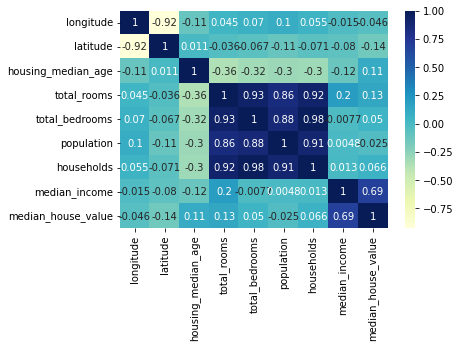

In [15]:
# plotting correlation heatmap - to see how the variables are correlated with each other
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)  
# displaying heatmap
plt.show()

In [16]:
#checking Missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
#calculating the missing value percentage
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent

total_bedrooms        0.010029
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

**Handling Missing values**

In [18]:
#By using median() handling missing values, Because it'll not impact even there is outlier values. Which will not work with mean().
data["total_bedrooms"]=data["total_bedrooms"].replace(np.NAN, data["total_bedrooms"].median())

In [19]:
#Verifying there is no missing value in any column
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Encoding**

In [20]:
#encoding the column Ocean_proximity which contains categorical value by using One Hot Encoding - get_dummies()
encoded_data = pd.get_dummies(data,columns=['ocean_proximity'])
encoded_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


**Outlier Detection**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


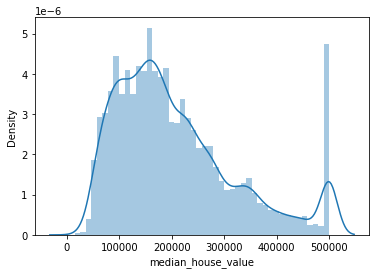

In [ ]:
#visualizing the datapoints to check any outlier in the dataset using distplot()
sns.distplot(encoded_data['median_house_value'])

In [21]:
#Calculating IQR to find the outlier value range
Q1 = np.percentile(encoded_data['median_house_value'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(encoded_data['median_house_value'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [22]:
#viewing the shape of data before dropping outlier values
encoded_data.shape

(20640, 14)

In [23]:
#calculating upper bound & lower bound values
# Upper bound
upper = np.where(encoded_data['median_house_value'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(encoded_data['median_house_value'] <= (Q1-1.5*IQR))

In [24]:
#dropping the outlier values
encoded_data.drop(upper[0], inplace = True)
encoded_data.drop(lower[0], inplace = True)

In [25]:
#viewing the shape of data after dropping outlier values
encoded_data.shape

(19569, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


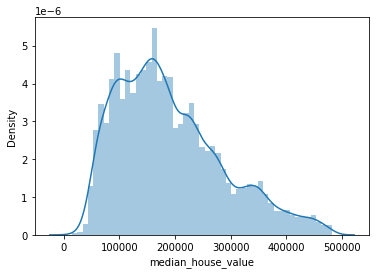

In [26]:
#visualizing the datapoints again to verify there is no outlier by distplot()
sns.distplot(encoded_data['median_house_value'])

In [27]:
#splitting the target variable & test variable
X_column=["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income", "ocean_proximity_<1H OCEAN",	"ocean_proximity_INLAND",	"ocean_proximity_ISLAND",	"ocean_proximity_NEAR BAY",	"ocean_proximity_NEAR OCEAN"]
y_column=["median_house_value"]

In [28]:
X=encoded_data[X_column]
y=encoded_data[y_column]

In [29]:
#spliting the dataset as train & test dataset by using train_test_split, 80% Train data & 20% Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

**Linear Regression**: Linear Regression is an algorithm used to predict values that are continuous in nature.

In [30]:
#creating linear_regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [31]:
#By using linear_regression_model.predict finding predict value
y_pred = linear_regression_model.predict(X_test)

In [32]:
#calculating Mean Squared Error
mse= mean_squared_error(y_test,y_pred)
mse

3651836655.655768

In [33]:
##calculating Root Mean Squared Error
sqrt(mean_squared_error(y_test,y_pred)) 

60430.42822664562

**Modeling:** In this process, we are going to build and train five different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Bayesian regression model, Elastic Net regression model. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. And the process for all the models are the same, first, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

In [34]:
# 1. OLS
from sklearn.metrics import explained_variance_score

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

In [35]:
evs=explained_variance_score(y_test, ols_yhat)
evs

0.5945125597711929

In [37]:
rsqu = r2(y_test, ols_yhat)
rsqu

0.5945028940760295

In [38]:
mse= mean_squared_error(y_test,ols_yhat)
mse

3651836655.655768

In [39]:
rmse=sqrt(mse)
rmse

60430.42822664562

In [40]:
# 2. Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

In [41]:
evs=explained_variance_score(y_test, ridge_yhat)
evs

0.5944914908680203

In [42]:
rsqu = r2(y_test, ridge_yhat)
rsqu

0.5944822716623612

In [43]:
mse= mean_squared_error(y_test,ridge_yhat)
mse

3652022377.5390124

In [44]:
rmse=sqrt(mse)
rmse

60431.96486578119

In [45]:
# 3. Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+12, tolerance: 1.430e+10
  model = cd_fast.enet_coordinate_descent(


In [46]:
evs=explained_variance_score(y_test, lasso_yhat)
evs

0.594512575888671

In [47]:
rsqu = r2(y_test, lasso_yhat)
rsqu

0.5945029113361007

In [48]:
mse= mean_squared_error(y_test,lasso_yhat)
mse

3651836500.2145586

In [49]:
rmse=sqrt(mse)
rmse

60430.42694052855

In [50]:
# 4. Bayesian
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
evs=explained_variance_score(y_test, bayesian_yhat)
evs

0.5940077046952879

In [52]:
rsqu = r2(y_test, bayesian_yhat)
rsqu

0.5939999743114455

In [53]:
mse= mean_squared_error(y_test,bayesian_yhat)
mse

3656365863.890133

In [54]:
rmse=sqrt(mse)
rmse

60467.89118110646

In [55]:
# 5. ElasticNet
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [56]:
evs=explained_variance_score(y_test, en_yhat)
evs


0.5929161711071183

In [57]:
rsqu = r2(y_test, en_yhat)
rsqu

0.5929097372401437

In [58]:
mse= mean_squared_error(y_test,en_yhat)
mse

3666184349.9956317

In [59]:
rmse=sqrt(mse)
rmse

60549.02435213661